# Assignment-Time Series Analysis
Due on Oct. 24th : Kratika Aggarwal

Points: 95

Please retrieve daily closing stock price of AT&T using `yahoo finance`. Then, do the following tasks:
    
Question 1. Analyze the descriptive statistics, draw line plot and explain your first impression about the stationarity of the data. (20 pts)

Question 2. Check the stationarity of the data using acf, pacf, and adf test and interpret if it is stationary.(20 pts)

Question 3. If the series is not stationary, please make it stationary.(20 pts)

Question 4. Model the series using moving average and autoregressive model with an optimum lag.(20 pts)

Questions 5. Visualize the result using train, test data and forecast in a single plot and calculate the predictive performance using RMSE metric.(20 pts)

In [ ]:
# codes here

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10,6)
import datetime
import yfinance as yf
import warnings
warnings.filterwarnings('ignore')

In [ ]:
stock = 'T'
start = datetime.datetime(2021,1,1)
end = datetime.datetime(2022,8,1)
t = yf.download(stock, start = start, end=end, interval='1d')

[*********************100%***********************]  1 of 1 completed


In [ ]:
t.head(10)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-01-04,22.197886,22.273415,21.918428,22.235649,18.810324,86700816
2021-01-05,22.280968,22.469790,22.046827,22.099697,18.695318,83054520
2021-01-06,22.212992,22.658609,22.182779,22.530210,19.059513,73455520
2021-01-07,22.673716,22.726585,22.416918,22.590633,19.110628,71265359
2021-01-08,22.009064,22.061934,21.714502,21.918428,18.978834,72471656
2021-01-11,21.706949,21.918428,21.661631,21.805136,18.880737,40833484
2021-01-12,21.805136,21.805136,21.533234,21.714502,18.802256,57515222
2021-01-13,21.744713,21.752266,21.503021,21.608761,18.710699,51383116
2021-01-14,21.638973,22.484894,21.548338,22.122356,19.155413,84548919


In [ ]:
t.describe()

,Open,High,Low,Close,Adj Close,Volume
count,396.000000,396.000000,396.000000,396.000000,396.000000,3.960000e+02
mean,20.469568,20.657445,20.291976,20.469390,18.802002,5.760999e+07
std,1.779361,1.769183,1.785192,1.770492,1.215567,2.977624e+07
min,16.827795,16.918428,16.631420,16.744713,15.583441,2.073290e+07
25%,18.978476,19.240936,18.782099,18.959425,17.874916,4.115022e+07
50%,20.697433,20.851737,20.521149,20.692432,18.919979,4.997795e+07
75%,21.824018,21.944864,21.655967,21.825906,19.587687,6.678069e+07
max,25.309668,25.589125,24.365559,24.645016,21.825567,3.270974e+08


In [ ]:
t_close=t['Close']
t_close.head()

Date
2021-01-04    22.235649
2021-01-05    22.099697
2021-01-06    22.530210
2021-01-07    22.590633
2021-01-08    21.918428
Name: Close, dtype: float64

In [ ]:
t_close.info()

<class 'pandas.core.series.Series'>
DatetimeIndex: 396 entries, 2021-01-04 to 2022-07-29
Series name: Close
Non-Null Count  Dtype  
--------------  -----  
396 non-null    float64
dtypes: float64(1)
memory usage: 6.2 KB


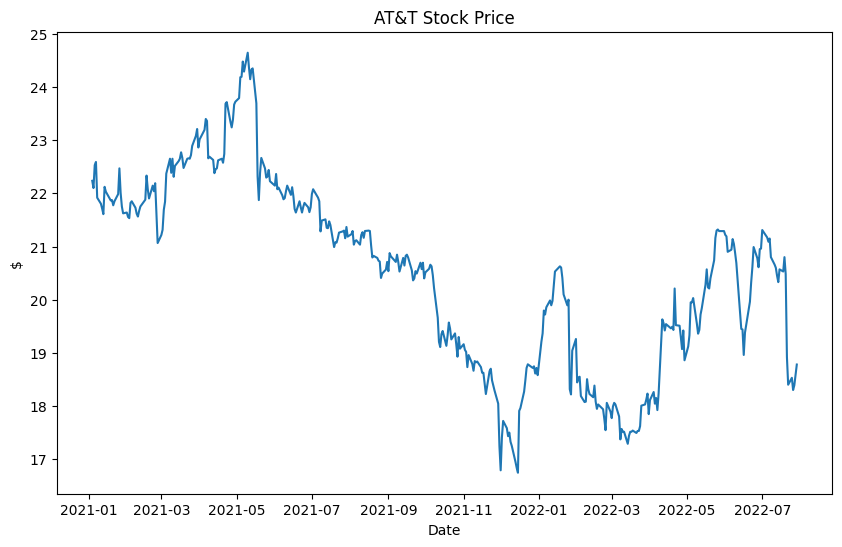

In [ ]:
plt.plot(t_close)
plt.xlabel('Date')
plt.ylabel('$')
plt.title('AT&T Stock Price')
plt.show()

If we eyeball, and connect the starting and ending point in the graph, we can see a downward trend. 

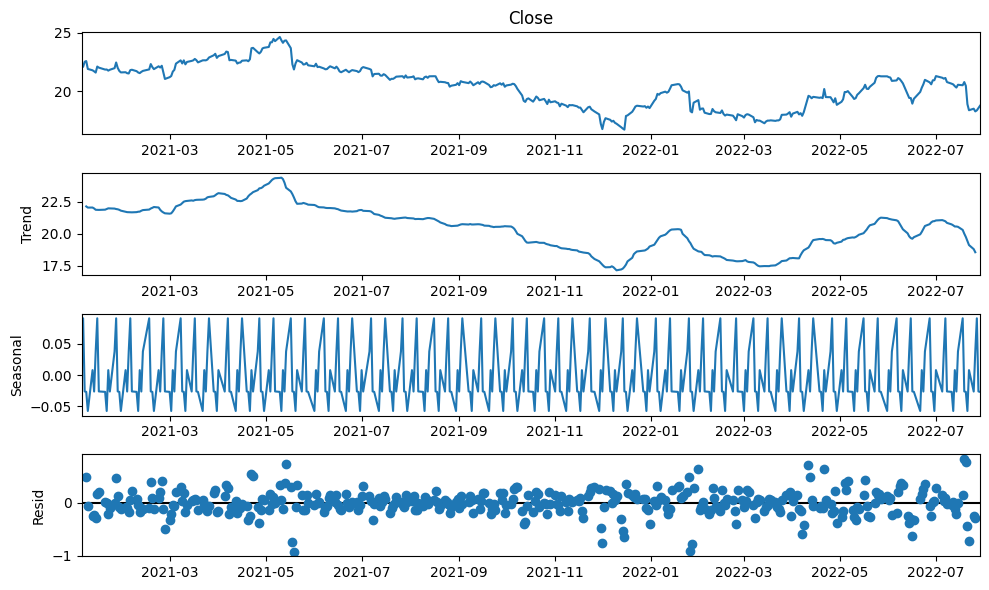

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(t_close, model='additive', period=7)
decomposition.plot()
plt.show()

In the first graph, we see the behavior of the raw data. Overall, it has a downward trend despite a spike at the beginning of 2022.

The last graph show the residuals. This is obtained after removing the trend and seasonal components from the time series. If we end up with a rather stable residual, it means that our data is stationary structure and ready to move on the modeling part. In our case, data is not as stable. 

## Statistical Test for detecting stationarity: ADF

In [ ]:
from statsmodels.tsa.stattools import adfuller
stat_test = adfuller(t_close)
print('The test statistic is {} and p-value is {}'.format(stat_test[0], stat_test[1]))

The test statistic is -1.715788757064227 and p-value is 0.4229965426186896


As the p-value is greater than 0.05 hence it is safe the say that the data is non-stationary.

## Autocorrelation Function (ACF) 

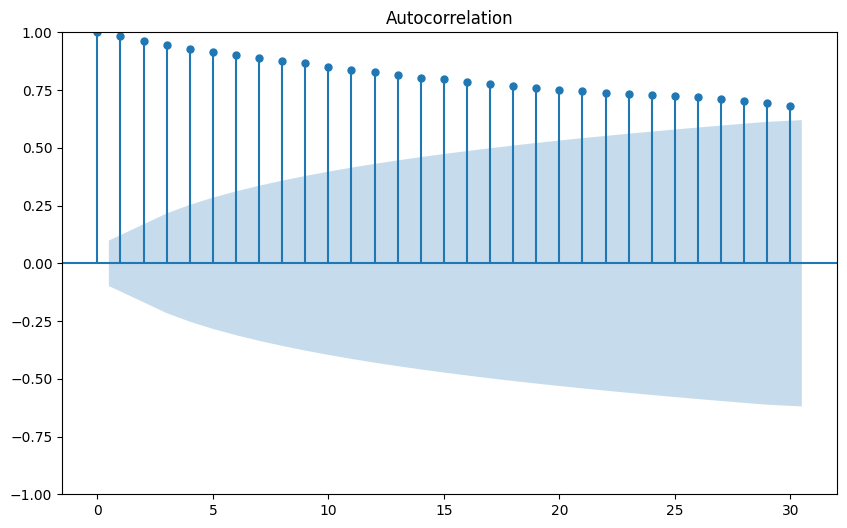

In [ ]:
import statsmodels.api as sm
sm.graphics.tsa.plot_acf(t_close, lags=30);

The `acf` plot indicates that acf is slowly decaying, which is an indicator of non-stationarity.

## Partial Autocorrelation Function (PACF) 

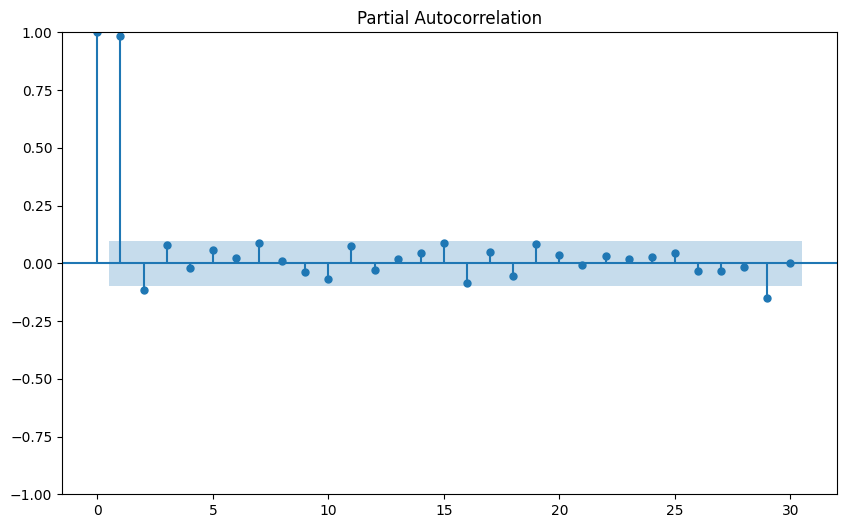

In [ ]:
import statsmodels.api as sm
sm.graphics.tsa.plot_pacf(t_close, lags=30);

In [ ]:
t_diff = t_close.diff().dropna()
t_diff

Date
2021-01-05   -0.135952
2021-01-06    0.430513
2021-01-07    0.060423
2021-01-08   -0.672205
2021-01-11   -0.113293
                ...   
2022-07-25    0.130001
2022-07-26   -0.230001
2022-07-27    0.090000
2022-07-28    0.190001
2022-07-29    0.200001
Name: Close, Length: 395, dtype: float64

On this plot, there is a significant correlation at lag 1 followed by correlations that are not significant. This pattern indicates an autoregressive term of order 1.

In [ ]:
from statsmodels.tsa.stattools import adfuller
stat_test = adfuller(t_diff)
print('The test statistic is {} and p-value is {}'.format(stat_test[0], stat_test[1]))

The test statistic is -14.953108483675342 and p-value is 1.2717011397742714e-27


After taking the first difference, it is quite obvious that the time series becomes stationary, as the pvalue is below 0.05.

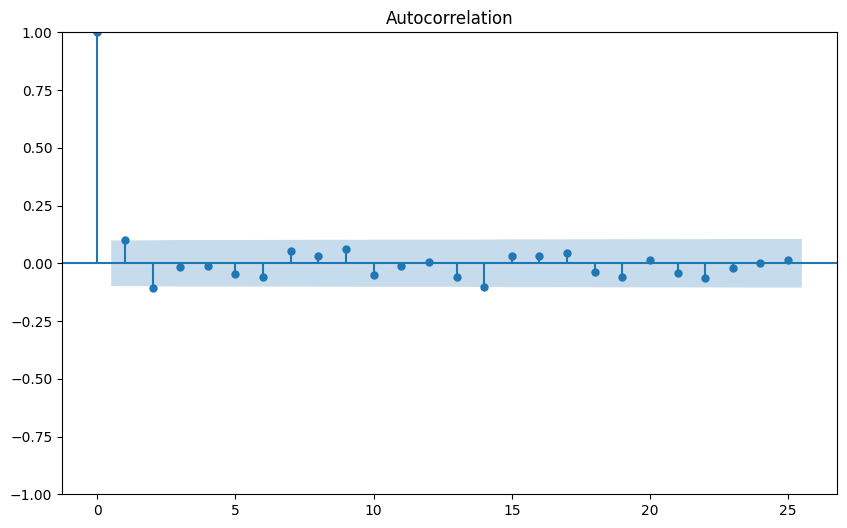

In [ ]:
import statsmodels.api as sm
sm.graphics.tsa.plot_acf(t_diff, lags=25);

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

In [ ]:
train_len = int(len(t_diff) * 0.8)
diff_train = t_diff[:train_len]
diff_test = t_diff[train_len:]

In [ ]:
start = len(diff_train)
end = len(diff_train) + len(diff_test) - 1

In [ ]:
ma_model = ARIMA(diff_train, order=(0, 0, 14))
ma_result = ma_model.fit()

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [ ]:
ma_pred = ma_result.predict(start, end)
ma_pred.index = diff_test.index

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


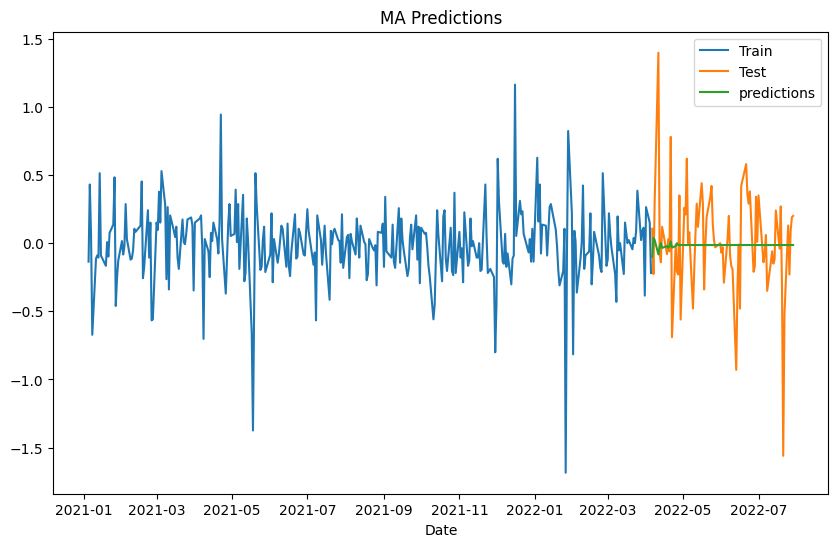

In [ ]:
plt.plot(diff_train.index, diff_train, label='Train')
plt.plot(diff_test.index, diff_test, label='Test')
plt.plot(ma_pred.index , ma_pred, label='predictions')
plt.title('MA Predictions')
plt.legend()
plt.xlabel('Date')
plt.show()

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
mae_ma = mean_absolute_error(diff_test, ma_pred)
mse_ma = mean_squared_error(diff_test, ma_pred)
rmse_ma = np.sqrt(mean_squared_error(diff_test, ma_pred))

In [ ]:
ma_perf = {'mae_ma': mae_ma,
             'mse_ma':mse_ma,
             'rmse_ma':rmse_ma}
ma_perf = pd.DataFrame([ma_perf])
ma_perf

,mae_ma,mse_ma,rmse_ma
0,0.264922,0.145428,0.38135


In [ ]:
ma_model = ARIMA(t_diff, order=(0, 0, 14))
ma_result = ma_model.fit()

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [ ]:
forecast_index = pd.date_range(diff_test.index[-1], periods=10)

In [ ]:
ma_forecast = ma_result.forecast(steps=10)
ma_forecast.index = forecast_index

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


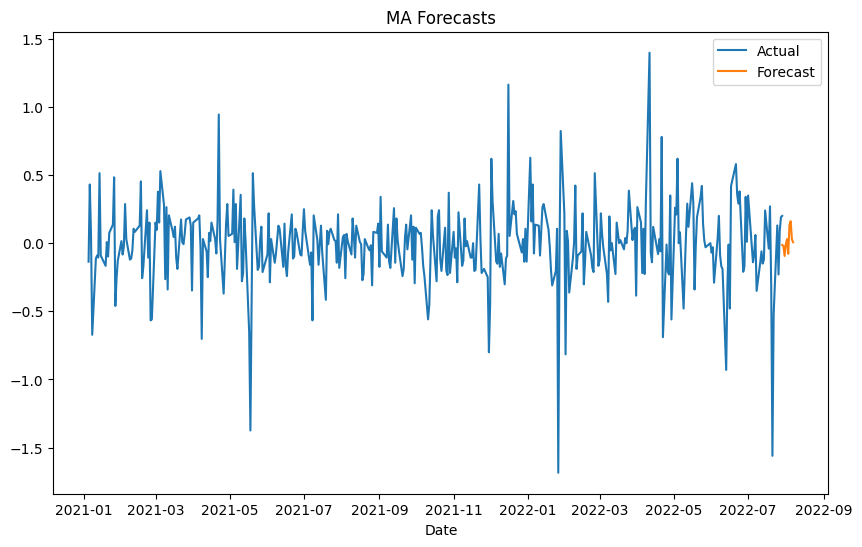

In [ ]:
plt.plot(t_diff.index, t_diff, label='Actual')
plt.plot(ma_forecast.index, ma_forecast, label='Forecast')
plt.legend()
plt.title('MA Forecasts')
plt.xlabel('Date')
plt.show()

In [ ]:
ar_model = ARIMA(diff_train, order=(14, 0, 0))
ar_result = ar_model.fit()

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


**Remark:** The 14th lag is not significant. Please check the PACF plot.\
(-5 Points)

In [ ]:
ar_pred = ar_result.predict(start, end)
ar_pred.index = diff_test.index

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


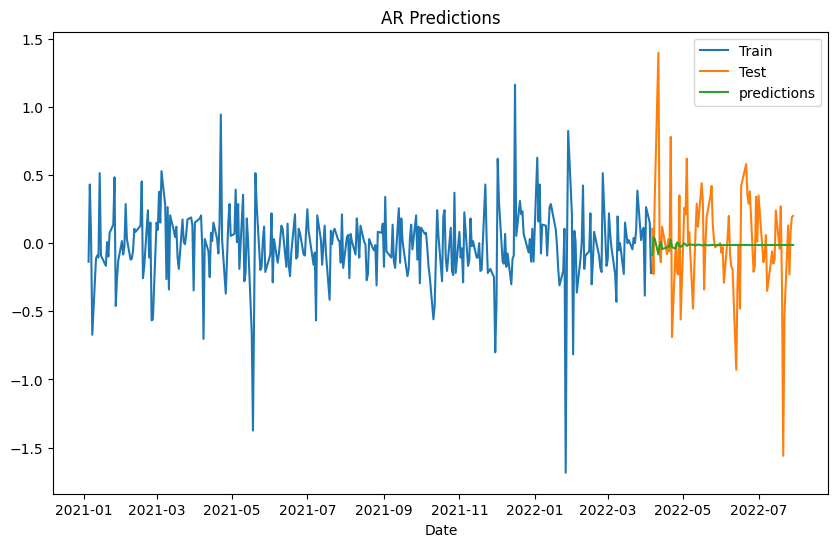

In [ ]:
plt.plot(diff_train.index, diff_train, label='Train')
plt.plot(diff_test.index, diff_test, label='Test')
plt.plot(ar_pred.index , ar_pred, label='predictions')
plt.title('AR Predictions')
plt.legend()
plt.xlabel('Date')
plt.show()

In [ ]:
mae_ar = mean_absolute_error(diff_test, ar_pred)
mse_ar = mean_squared_error(diff_test, ar_pred)
rmse_ar = np.sqrt(mean_squared_error(diff_test, ar_pred))

In [ ]:
ar_perf = {'mae_ar': mae_ar,
             'mse_ar':mse_ar,
             'rmse_ar':rmse_ar}
ar_perf = pd.DataFrame([ar_perf])
ar_perf

,mae_ar,mse_ar,rmse_ar
0,0.264978,0.145216,0.381072


In [ ]:
ar_model = ARIMA(t_diff, order=(14, 0, 0))
ar_result = ar_model.fit()

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [ ]:
ar_forecast = ar_result.forecast(steps=10)
ar_forecast.index = forecast_index

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


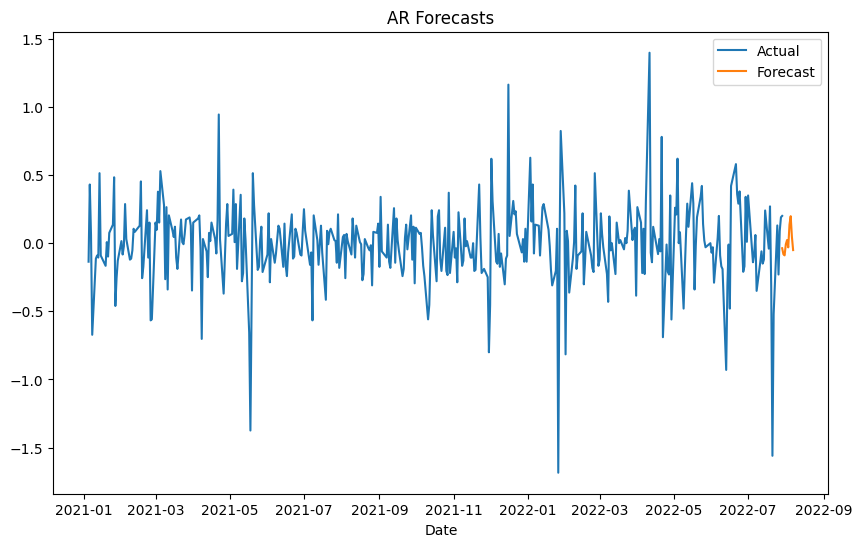

In [ ]:
plt.plot(t_diff.index, t_diff, label='Actual')
plt.plot(ar_forecast.index, ar_forecast, label='Forecast')
plt.legend()
plt.title('AR Forecasts')
plt.xlabel('Date')
plt.show()

References
1. play.hbomax.com/page/urn:hbo:page:home